In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.interpolate as interpolate

def lorenz(state, t, sigma=10., beta=8./3, rho=28.0):
    x, y, z = state
    """Compute the time-derivative of a Lorenz system."""
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

In [2]:
x0 = [1, 1, 1]  # starting vector
t = np.arange(0, 40, 0.01)
xt = integrate.odeint(lorenz, x0, t)

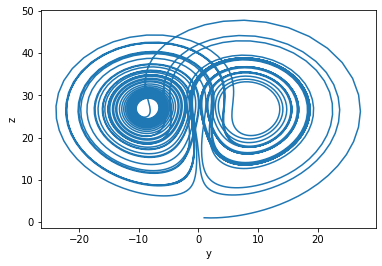

In [3]:
plt.plot(xt[:, 1], xt[:, 2])
plt.xlabel("y")
plt.ylabel("z")
#plt.savefig("img/lorenz_yz.png", dpi=300)
plt.show()

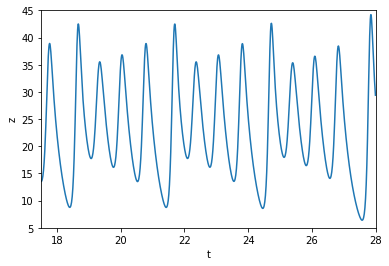

In [4]:
start = 1750
end = 2800
plt.plot(t[start:end], xt[start:end, 2])
plt.axis([t[start], t[end], 5, 45])
plt.xlabel("t")
plt.ylabel("z")
#plt.savefig("img/lorenz_z.png", dpi=300)
plt.show()

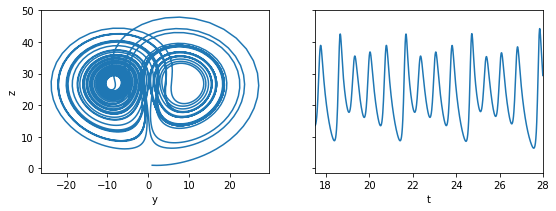

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(9, 3), sharey=True)
ax[0].plot(xt[:, 1], xt[:, 2])
ax[0].set_ybound([0, 50])
ax[0].set_xlabel("y")
ax[0].set_ylabel("z")

ax[1].plot(t[start:end], xt[start:end, 2])
ax[1].set_xbound([t[start], t[end]])
ax[1].set_xlabel("t")

plt.show()

In [6]:
z0 = [1, 1, 1]  # starting vector
t = np.arange(0, 500, 0.01)  # one thousand time steps
zt = integrate.odeint(lorenz, x0, t)

z = zt[:,2]
max_z = [z for zp, z, zn in zip(z, z[1:], z[2:]) if zp < z and z > zn]

D:\Miniconda3\lib\site-packages\matplotlib\mathtext.py:2542: SyntaxWarning: Exception creating Regex for oneOf, building MatchFirst
  p.subsuperop    <<= oneOf(["_", "^"])


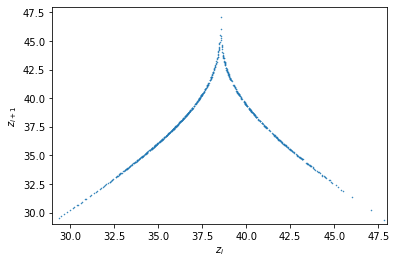

In [7]:
plt.plot(max_z[:-1], max_z[1:], 'o', ms=0.5)
plt.axis([29, 48, 29, 48])
plt.xlabel("$z_{i}$")
plt.ylabel("$z_{i+1}$")
#plt.savefig("img/lorenz_map.png", dpi=300)
plt.show()

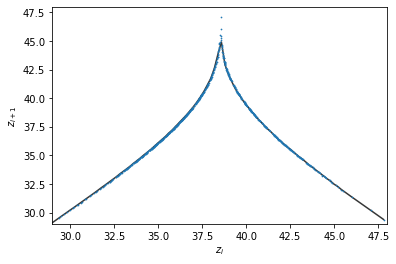

In [8]:
f = interpolate.interp1d(max_z[:-1], max_z[1:], 'slinear', fill_value='extrapolate')
x = np.arange(29, 48, 0.2)

plt.plot(x, f(x), color="xkcd:dark grey")
plt.plot(max_z[:-1], max_z[1:], 'o', ms=0.7, zorder=10)

plt.axis([29, 48, 29, 48])
plt.xlabel("$z_{i}$")
plt.ylabel("$z_{i+1}$")
#plt.savefig("img/lorenz_map_interpolation.png", dpi=300)
plt.show()


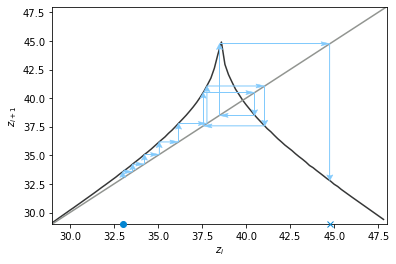

In [9]:
plt.plot(x, f(x), "xkcd:dark grey")
plt.plot([29, 48], [29, 48], "xkcd:grey")
plt.axis([29, 48, 29, 48])

iterations = 10
x_k = 33
x_k1 = f(x_k)

plt.plot(x_k, 29, 'o', color="xkcd:cerulean", clip_on=False, zorder=10) 

arrow_kwargs = dict(length_includes_head=True, lw=0.5, 
                    head_length=0.5, head_width=0.35, 
                    overhang = 0.2, color="xkcd:sky",
                    zorder = 5)

#plt.plot([x_k, x_k], [x_k, x_k1], color="xkcd:pastel red", lw=0.5)
plt.arrow(x_k, x_k, 0, x_k1 - x_k, **arrow_kwargs)

ticks = [x_k]
tick_labels = ["$z_0$"]
for i in range(iterations):
    #plt.plot([x_k, x_k1], [x_k1, x_k1], color="xkcd:pastel red", lw=0.5)
    plt.arrow(x_k, x_k1, x_k1 - x_k, 0, **arrow_kwargs)
    #plt.plot(x_k1, 29, 'o', color="xkcd:red", clip_on=False, zorder=10) 
    
    x_k = x_k1
    x_k1 = f(x_k)
    #ticks.append(x_k)
    #tick_labels.append("$z_{{{0}}}$".format(i+1))
    #plt.plot([x_k, x_k], [x_k, x_k1],color="xkcd:pastel red", lw=0.5)
    plt.arrow(x_k, x_k, 0, x_k1 - x_k, **arrow_kwargs)

plt.plot(x_k, 29, 'x', color="xkcd:cerulean", clip_on=False, zorder=10) 


plt.xlabel("$z_{i}$")
plt.ylabel("$z_{i+1}$")
#plt.xticks(ticks, tick_labels)
#plt.savefig("img/lorenz_map_orbit_33.png", dpi=300)
plt.show()

In [10]:
def approx_lyapunov_exponent(f, rand_interval, eps=1e-8, discard=300, iters=10000):
    a, b = rand_interval
    x = (b - a)*np.random.random() + a
    for i in range(discard):
        x = f(x)

    sum_log = 0
    for i in range(iters):
        df = 0.5 * (f(x + eps) - f(x - eps)) / eps
        sum_log += np.log(abs(df))
        x = f(x)
    
    return sum_log/iters

# Exp de lyapunov aproximado de el mapa de lorenz
approx_lyapunov_exponent(f, [30, 47])

0.7616080729216753

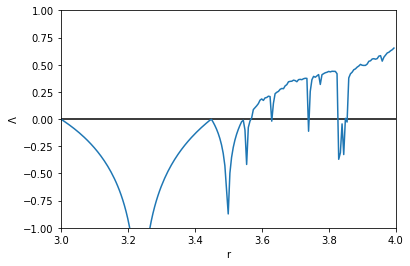

In [11]:
# Mapa del exponente de lyapunov para la ecuacion logistica

logistic = lambda x, r : r*x*(1-x)
r = np.arange(3, 4, 0.005)
plt.plot(r, approx_lyapunov_exponent(lambda x: logistic(x, r), [0, 1]))
plt.hlines(0, 3, 4)
plt.axis([3, 4, -1, 1])
plt.xlabel("r")
plt.ylabel("$\Lambda$")
#plt.savefig("img/logistic_Lya_exponent_map.png", dpi=300)
plt.show()

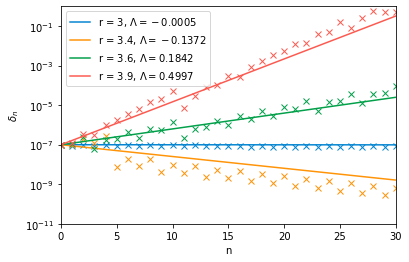

In [12]:

logistic = lambda x, r :  r*x*(1-x)
x0 = 0.35
eps = 0.0000001
r_s = [3, 3.4, 3.6, 3.9]
iterations = 30

colors = ["xkcd:cerulean", "xkcd:tangerine", "xkcd:emerald", "xkcd:coral",]
for r, c in zip(r_s, colors):
    l1 = [x0]
    l2 = [x0 + eps]
    
    for i in range(iterations):
        l1.append(logistic(l1[-1], r))
        l2.append(logistic(l2[-1], r))
    L = approx_lyapunov_exponent(lambda x: logistic(x, r), [x0,x0])
    delta = lambda n : eps * np.exp(L * n)
    plt.plot(range(iterations + 1), np.abs(np.array(l1)-np.array(l2)), 'x', color=c)
    plt.plot([0, iterations], [delta(x) for x in [0, iterations]], color=c, label="r = {0}, $\Lambda = {1:0.4f}$".format(r, L))

plt.yscale("log")
plt.axis([0, iterations, 1e-11, 1])
plt.legend()
plt.xlabel("n")
plt.ylabel("$\delta_n$")
#plt.savefig("img/logistic_experimental_distances_x0=0.35.png", dpi=300)
plt.show()

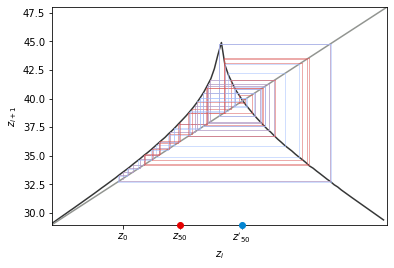

In [13]:
plt.plot(x, f(x), "xkcd:dark grey")
plt.plot([29, 48], [29, 48], "xkcd:grey")
plt.axis([29, 48, 29, 48])

iterations = 50
eps = 1e-7

x_k = 33
x_k1 = f(x_k)

z_k = x_k + eps
z_k1 = f(z_k)




plt.plot([x_k, x_k], [x_k, x_k1], color="xkcd:pastel red", lw=0.5)
plt.plot([z_k, z_k], [z_k, z_k1], color="xkcd:pastel blue", lw=0.5)


ticks = [x_k]
tick_labels = ["$z_0$"]
for i in range(iterations):
    
    plt.plot([x_k, x_k1], [x_k1, x_k1], color="xkcd:pastel red", lw=0.5)
    
    
    x_k = x_k1
    x_k1 = f(x_k)
    
    plt.plot([x_k, x_k], [x_k, x_k1],color="xkcd:pastel red", lw=0.5)
    
    plt.plot([z_k, z_k1], [z_k1, z_k1], color="xkcd:pastel blue", lw=0.5)
    
    z_k = z_k1
    z_k1 = f(z_k)
    
    plt.plot([z_k, z_k], [z_k, z_k1],color="xkcd:pastel blue", lw=0.5)
    



plt.plot(x_k, 29, 'o', color="xkcd:red", clip_on=False, zorder=10) 
plt.plot(z_k, 29, 'o', color="xkcd:cerulean", clip_on=False, zorder=10) 


ticks += [x_k, z_k]
tick_labels += ["$z_{{{}}}$".format(iterations), "$z'_{{{}}}$".format(iterations)]
plt.xticks(ticks, tick_labels)

plt.xlabel("$z_{i}$")
plt.ylabel("$z_{i+1}$")
#plt.savefig("img/lorenz_map_double_orbit_33_50iters_1e-7.png", dpi=300)
plt.show()

In [14]:
from matplotlib import animation
%matplotlib qt

In [15]:
fig, ax = plt.subplots()
ax.axis([0, 5, 5, 45])
#ax.set_xticks([])
ln,  = ax.plot([], [], color='xkcd:cerulean')
dot, = ax.plot([], [], 'o', color="xkcd:tangerine")
def animate(i):
    if i > 450:
        shift = (i/100 - 4.5)
        ax.set_xbound([shift, 5 + shift])
        
    ln.set_data(t[:i], xt[:i, 2])
    dot.set_data(t[i], xt[i, 2])
    return ln, dot, 
ani = animation.FuncAnimation(fig, animate, range(4000), interval=1000/60)

plt.show()


In [16]:
fig, ax = plt.subplots()

plt.plot(xt[:, 1], xt[:, 2], color='xkcd:cerulean')
ln,  = ax.plot([], [], "o", color="xkcd:tangerine")
ax.axis([-30, 30, 0, 50])
def animate(i):
    ln.set_data(xt[i, 1], xt[i, 2])
    return ln, 
ani = animation.FuncAnimation(fig, animate, range(4000), blit=True, interval=1000/60)
plt.show()

In [17]:
#V1
fig, axes = plt.subplots(2, 1, figsize=(6, 7), gridspec_kw=dict(height_ratios=[3, 1]))
#V2
#fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].axis([-30, 30, 0, 50])
lorenz_t, = axes[0].plot([], [])
lorenz_d, = axes[0].plot([], [], 'ro')
axes[0].set_ylabel("z")
axes[0].set_xlabel("y")

axes[1].axis([0, 5, 0, 50])

z_t, = axes[1].plot([], [])
z_d, = axes[1].plot([], [], 'ro')
axes[1].set_ylabel("z")
axes[1].set_xlabel("t")

def lorenz_anim(i):
    lorenz_t.set_data(xt[:i, 1], xt[:i, 2])
    lorenz_d.set_data(xt[i, 1], xt[i, 2])
    
    if i > 450:
        shift = (i/100 - 4.5)
        axes[1].set_xbound([shift, 5 + shift])
        
    z_t.set_data(t[:i], xt[:i, 2])
    z_d.set_data(t[i], xt[i, 2])

    return lorenz_t, lorenz_d




lorenz_ani = animation.FuncAnimation(fig, lorenz_anim, range(500), interval=1000/60)
#lorenz_ani.save("anim/lorenz_v2.mp4", dpi=150, fps=60, extra_args=['-vcodec', 'libx264'])
plt.show()

In [18]:
r = 3.85
logistic = lambda x :  r*x*(1-x)
x0 = 0.3

fig, ax = plt.subplots()
ax.axis([0, 1, 0, 1])

x = np.linspace(0, 1, 50)
ax.plot(x, logistic(x), color="xkcd:black")
ax.plot([0, 1], [0, 1], color="xkcd:grey")
ax.set_xlabel("$x_{i}$")
ax.set_ylabel("$x_{i+1}$")

dot, = ax.plot(x0, x0, 'o', color="xkcd:red")
line, = ax.plot([], [], color="xkcd:pastel red", lw=0.5)

dot2, = ax.plot(x0, 0, 'o', color="xkcd:red", zorder=10, clip_on=False)

l_x = [x0]
l_y = [x0]

prev_f = x0
next_f = logistic(x0)

def logistic_anim(frame):
    m = frame % 100
    global prev_f, next_f
    
    if m <= 25:
        pass
    elif m <= 50:
        
        dot.set_ydata(prev_f + (m/25 - 1) * (next_f - prev_f))
        l_y.append(prev_f + (m/25 - 1) * (next_f - prev_f))
        l_x.append(prev_f)
        line.set_data(l_x, l_y)

    elif m <= 75:
        
        dot.set_xdata(prev_f + (m/25 - 2) * (next_f - prev_f))
        dot2.set_xdata(prev_f + (m/25 - 2) * (next_f - prev_f))
        l_y.append(next_f)
        l_x.append(prev_f + (m/25 - 2) * (next_f - prev_f))
        line.set_data(l_x, l_y)

    if m == 99:
        
        prev_f = next_f
        next_f = logistic(prev_f)
    
    return dot, line, dot2

ani = animation.FuncAnimation(fig, logistic_anim, range(100), interval=1000/60)
plt.show()

In [19]:
r = 3.85
logistic = lambda x :  r*x*(1-x)
x0 = 0.3
z0 = x0 + 0.0001

fig, ax = plt.subplots()
ax.axis([0, 1, 0, 1])

x = np.linspace(0, 1, 50)
ax.plot(x, logistic(x), color="xkcd:black")
ax.plot([0, 1], [0, 1], color="xkcd:grey")
ax.set_xlabel("$x_{i}$")
ax.set_ylabel("$x_{i+1}$")

linex, = ax.plot([], [], color="xkcd:rose", lw=0.5)
dotx, = ax.plot(x0, x0, 'o', color="xkcd:red")

dot2x, = ax.plot(x0, 0, 'o', color="xkcd:red", zorder=10, clip_on=False)

lx_x = [x0]
lx_y = [x0]

prev_f = x0
next_f = logistic(x0)
prev_z = z0
next_z = logistic(z0)

lz_x = [z0]
lz_y = [z0]

linez, = ax.plot([], [], color="xkcd:pastel blue", lw=0.5)
dotz, = ax.plot(z0, z0, 'o', color="xkcd:cerulean")


dot2z, = ax.plot(z0, 0, 'o', color="xkcd:cerulean", zorder=10, clip_on=False)


def double_logistic_anim(frame):
    m = frame % 100
    global prev_f, next_f, prev_z, next_z
    
    if m <= 25:
        pass
    elif m <= 50:
        r = (m/25 - 1)
        
        
        lx_y.append(prev_f + r * (next_f - prev_f))
        lx_x.append(prev_f)
        linex.set_data(lx_x, lx_y)
        dotx.set_ydata(prev_f +  r * (next_f - prev_f))
        
        lz_y.append(prev_z + r * (next_z - prev_z))
        lz_x.append(prev_z)
        linez.set_data(lz_x, lz_y)
        dotz.set_ydata(prev_z +  r * (next_z - prev_z))
        

    elif m <= 75:
        r = (m/25 - 2)
        
        lx_y.append(next_f)
        lx_x.append(prev_f + r * (next_f - prev_f))
        linex.set_data(lx_x, lx_y)
        dotx.set_xdata(prev_f +  r * (next_f - prev_f))
        dot2x.set_xdata(prev_f + r * (next_f - prev_f))
        
        lz_y.append(next_z)
        lz_x.append(prev_z + r * (next_z - prev_z))
        linez.set_data(lz_x, lz_y)
        dotz.set_xdata(prev_z +  r * (next_z - prev_z))
        dot2z.set_xdata(prev_z + r * (next_z - prev_z))
    if m == 99:
        
        prev_f = next_f
        next_f = logistic(prev_f)
    
        prev_z = next_z
        next_z = logistic(prev_z)

    return dotx, linex, dot2x, dotz, linez, dot2z

ani = animation.FuncAnimation(fig, double_logistic_anim, range(100), interval=1000/60)
plt.show()

In [20]:
x0 = 33

fig, ax = plt.subplots()
x = np.arange(29, 48, 0.2)

ax.plot(x, f(x), color="xkcd:black")
ax.plot([29, 48], [29, 48], color="xkcd:grey")
ax.axis([29, 48, 29, 48])
ax.set_xlabel("$z_{i}$")
ax.set_ylabel("$z_{i+1}$")

dot, = ax.plot(x0, x0, 'o', color="xkcd:red")
line, = ax.plot([], [], color="xkcd:pastel red", lw=0.5)

dot2, = ax.plot(x0, 29, 'o', color="xkcd:red", zorder=10, clip_on=False)

l_x = [x0]
l_y = [x0]

prev_f = x0
next_f = f(x0)

def lorenz_map_anim(frame):
    m = frame % 100
    global prev_f, next_f
    
    if m <= 25:
        pass
    elif m <= 50:
        
        dot.set_ydata(prev_f + (m/25 - 1) * (next_f - prev_f))
        l_y.append(prev_f + (m/25 - 1) * (next_f - prev_f))
        l_x.append(prev_f)
        line.set_data(l_x, l_y)

    elif m <= 75:
        
        dot.set_xdata(prev_f + (m/25 - 2) * (next_f - prev_f))
        dot2.set_xdata(prev_f + (m/25 - 2) * (next_f - prev_f))
        l_y.append(next_f)
        l_x.append(prev_f + (m/25 - 2) * (next_f - prev_f))
        line.set_data(l_x, l_y)

    if m == 99:
        
        prev_f = next_f
        next_f = f(prev_f)
    
    return dot, line, dot2

ani = animation.FuncAnimation(fig, lorenz_map_anim, range(100), interval=1000/60)
plt.show()

In [21]:
x0 = 33
z0 = x0 + 0.001

fig, ax = plt.subplots()
x = np.arange(29, 48, 0.2)

ax.plot(x, f(x), color="xkcd:black")
ax.plot([29, 48], [29, 48], color="xkcd:grey")
ax.axis([29, 48, 29, 48])
ax.set_xlabel("$z_{i}$")
ax.set_ylabel("$z_{i+1}$")

linex, = ax.plot([], [], color="xkcd:rose", lw=0.5)
dotx, = ax.plot(x0, x0, 'o', color="xkcd:red")

dot2x, = ax.plot(x0, 29, 'o', color="xkcd:red", zorder=10, clip_on=False)

lx_x = [x0]
lx_y = [x0]

prev_f = x0
next_f = f(x0)
prev_z = z0
next_z = f(z0)

lz_x = [z0]
lz_y = [z0]

linez, = ax.plot([], [], color="xkcd:pastel blue", lw=0.5)
dotz, = ax.plot(z0, z0, 'o', color="xkcd:cerulean")


dot2z, = ax.plot(z0, 29, 'o', color="xkcd:cerulean", zorder=10, clip_on=False)


def double_logistic_anim(frame):
    m = frame % 100
    global prev_f, next_f, prev_z, next_z
    
    if m <= 25:
        pass
    elif m <= 50:
        r = (m/25 - 1)
        
        
        lx_y.append(prev_f + r * (next_f - prev_f))
        lx_x.append(prev_f)
        linex.set_data(lx_x, lx_y)
        dotx.set_ydata(prev_f +  r * (next_f - prev_f))
        
        lz_y.append(prev_z + r * (next_z - prev_z))
        lz_x.append(prev_z)
        linez.set_data(lz_x, lz_y)
        dotz.set_ydata(prev_z +  r * (next_z - prev_z))
        

    elif m <= 75:
        r = (m/25 - 2)
        
        lx_y.append(next_f)
        lx_x.append(prev_f + r * (next_f - prev_f))
        linex.set_data(lx_x, lx_y)
        dotx.set_xdata(prev_f +  r * (next_f - prev_f))
        dot2x.set_xdata(prev_f + r * (next_f - prev_f))
        
        lz_y.append(next_z)
        lz_x.append(prev_z + r * (next_z - prev_z))
        linez.set_data(lz_x, lz_y)
        dotz.set_xdata(prev_z +  r * (next_z - prev_z))
        dot2z.set_xdata(prev_z + r * (next_z - prev_z))
    if m == 99:
        
        prev_f = next_f
        next_f = f(prev_f)
    
        prev_z = next_z
        next_z = f(prev_z)

    return dotx, linex, dot2x, dotz, linez, dot2z

ani = animation.FuncAnimation(fig, double_logistic_anim, range(100), interval=1000/60)
plt.show()